In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy as copy

import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)

saveFig = 1
%matplotlib inline


In [2]:
#####################
import numpy as np
import scipy
from scipy.io import loadmat
import matplotlib.pyplot as plt
import pandas as pd


import seaborn as sns; sns.set()

#from bokeh.charts import BoxPlot, show
#from bokeh.io import push_notebook,show,output_notebook
#from bokeh.layouts import row
#from bokeh.plotting import figure 
#output_notebook()
sns.set_context("poster") # this makes things BIG for the poster 

# use matlab data 
TOJmat = loadmat('822e26_TOJ_matlab.mat',squeeze_me=1)
epochedButton = TOJmat['epochedButton']
epochedStim = TOJmat['epochedStim']
epochedTactor = TOJmat['epochedTactor']
tactorStimDiff = TOJmat['tactorStimDiff']
responseTimes = TOJmat['responseTimes']
whichPerceived = TOJmat['whichPerceived']
t = TOJmat['t']
epochedTactor = TOJmat['epochedTactor']

map_dict = {0: "haptic touch",1: "DCS"}

data = pd.DataFrame({'responseTimes (ms)':1e3*responseTimes,
                     'tactorStimDiff (ms)':-1e3*tactorStimDiff,
                     'firstFelt':whichPerceived,
                     'tactStimDiff':-1e3*tactorStimDiff
                    })

data['firstFeelName'] = data['firstFelt'].map(map_dict)




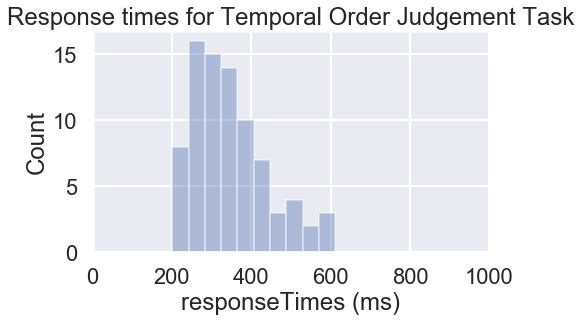

In [3]:
plt.figure(figsize=(8,5))
ax = sns.distplot(data['responseTimes (ms)'].dropna(),bins=10,kde=False);
plt.title('Response times for Temporal Order Judgement Task')
ax.set_ylabel('Count')
ax.set_xlim([0,1000])
plt.tight_layout()
if saveFig:
    plt.savefig('TOJ_822e26_hist.png',dpi=600)


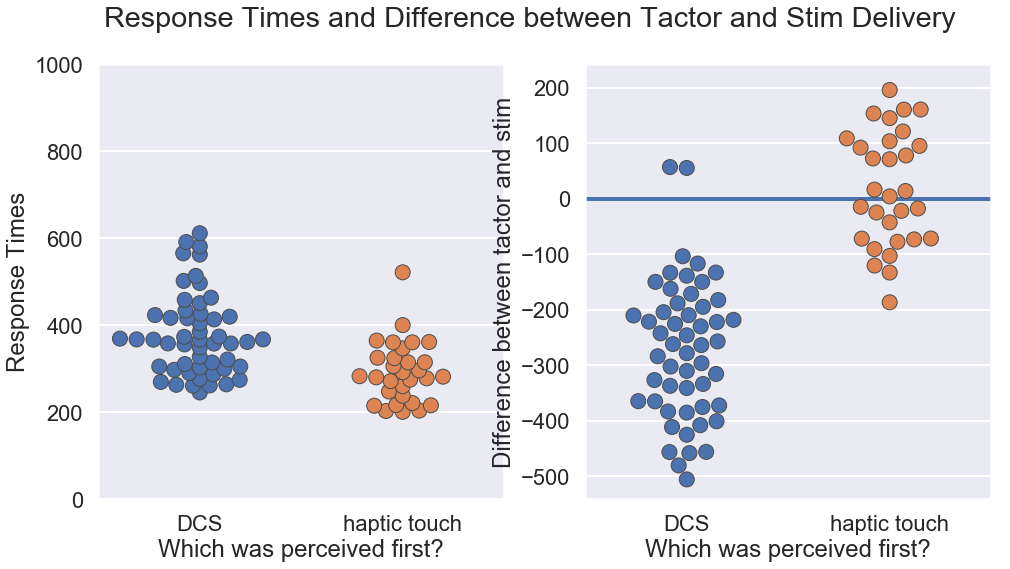

In [4]:
fig, ax = plt.subplots(1, 2,figsize=(16,8))
sns.swarmplot(x="firstFeelName", y="responseTimes (ms)", data=data,linewidth=1,size=15,ax=ax[0]);
ax[0].set_xlabel('Which was perceived first?')
ax[0].set_ylabel('Response Times')
ax[0].set_ylim([0,1000])

sns.swarmplot(x="firstFeelName", y="tactorStimDiff (ms)", data=data,linewidth=1,size=15,ax=ax[1]);
ax[1].set_xlabel('Which was perceived first?')
ax[1].set_ylabel('Difference between tactor and stim')
ax[1].axhline(y=0,linewidth=4)
plt.suptitle('Response Times and Difference between Tactor and Stim Delivery')
if saveFig:
    plt.savefig('TOJ_822e26_both_calculated.png',dpi=600)
    plt.savefig('TOJ_822e26_both_calculated.svg')
    plt.savefig('TOJ_822e26_both_calculated.eps')

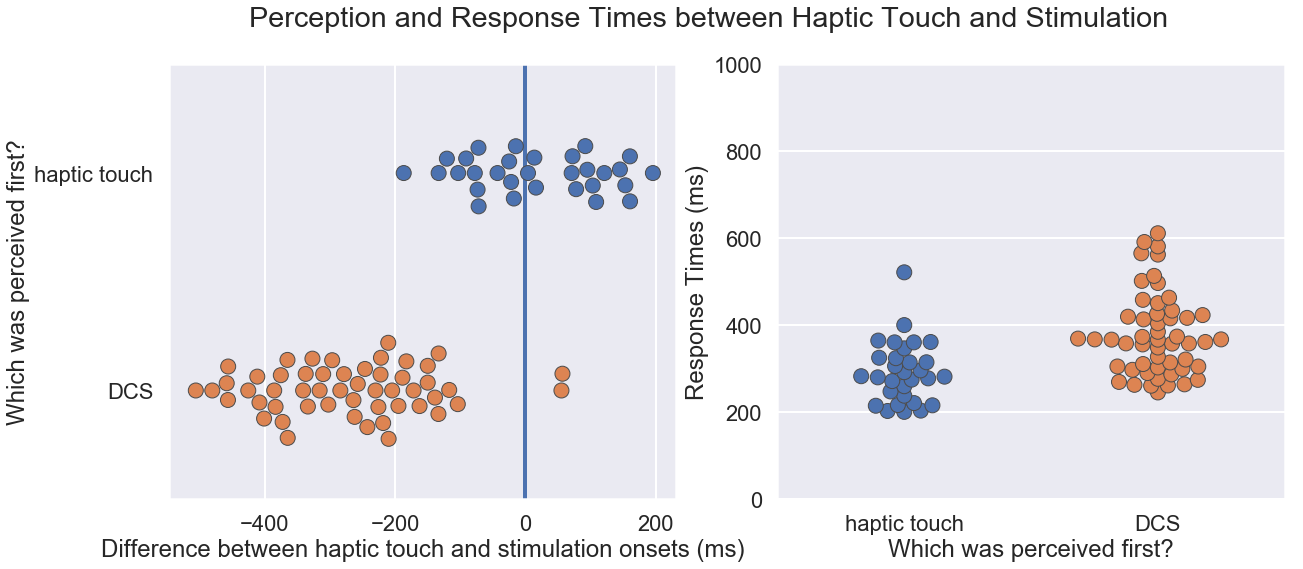

In [5]:
fig, ax = plt.subplots(1, 2,figsize=(20,8))


sns.swarmplot(y="firstFeelName", x="tactorStimDiff (ms)", data=data,linewidth=1,size=15,ax=ax[0],order=['haptic touch','DCS']);
ax[0].set_ylabel('Which was perceived first?')
ax[0].set_xlabel('Difference between haptic touch and stimulation onsets (ms)')
ax[0].axvline(x=0,linewidth=4)

sns.swarmplot(x="firstFeelName", y="responseTimes (ms)", data=data,linewidth=1,size=15,ax=ax[1],order=['haptic touch','DCS']);
#ax[1].axis.set_visible(False)
ax[1].set_xlabel('Which was perceived first?')
ax[1].set_ylabel('Response Times (ms)')
ax[1].set_ylim([0,1000])

plt.suptitle('Perception and Response Times between Haptic Touch and Stimulation')
if saveFig:
    plt.savefig('TOJ_822e26_both_calculated_v2.png',dpi=600)
    plt.savefig('TOJ_822e26_both_calculated_v2.svg')
    plt.savefig('TOJ_822e26_both_calculated_v2.eps')

In [6]:
dfGroup = data.groupby(['firstFeelName']).describe()
dfGroup[['tactorStimDiff (ms)','responseTimes (ms)']]

tactorStimDiff (ms)                                     \
                            count        mean         std        min   
firstFeelName                                                          
DCS                          52.0 -271.274142  124.161255 -505.89696   
haptic touch                 30.0   18.019669  102.975130 -186.73664   

                                                         responseTimes (ms)  \
                     25%        50%        75%       max              count   
firstFeelName                                                                 
DCS           -367.05280 -262.98368 -193.29024   56.9344               52.0   
haptic touch   -71.94624    8.92928  101.38624  195.7888               30.0   

                                                                       \
                     mean        std        min        25%        50%   
firstFeelName                                                           
DCS            379.613342  94.757964  245.51424  304.56832  366.91968   
haptic touch   292.687872  70.496737  200.82688  240.45568  282.31680   

                                     
                     75%        max  
firstFeelName                        
DCS            424.12032  611.53280  
haptic touch   325.01760  521.70752

### Kruskal wallis test between conditions and response times

In [7]:
#sub1_tact = dataCleaned[experiment["tactor"]][Subject["1"]]
stim = data[(data.firstFeelName =='DCS')]['responseTimes (ms)'].dropna()
tactor = data[(data.firstFeelName =='haptic touch')]['responseTimes (ms)'].dropna()
scipy.stats.kruskal(stim,tactor)


KruskalResult(statistic=17.29639132404075, pvalue=3.1979359145094334e-05)

### Try fitting sigmoid curve 

In [8]:
import sys
sys.path.insert(0, 'C:\\Users\\david\\SharedCode\\psychofit')
import psychofit
import pandas as pd

In [9]:
rangeBins = np.arange(-550,100,45)
histDCS,edges = np.histogram(data.tactStimDiff[data.firstFeelName=='DCS'],rangeBins)
histTact,edges = np.histogram(data.tactStimDiff[data.firstFeelName!='DCS'],rangeBins)
edgeMid = edges[:-1] + (edges[1:] - edges[:-1]) / 2

#edgeMid = np.arange(-50,50,10)
ratio = (histTact)/(histDCS+histTact)

#ratio[0:7] = ratio[0:7] + [0.01,0.03,0.05,0.1,0.15,0.2,0.22]

# actual parameters of the observer
#bias = -10.
#threshold = 20.
#gamma = .1

# fake experimental data given those parameters
#ratio = psychofit.erf_psycho([bias, threshold, gamma],edgeMid)

-17.401880659706535

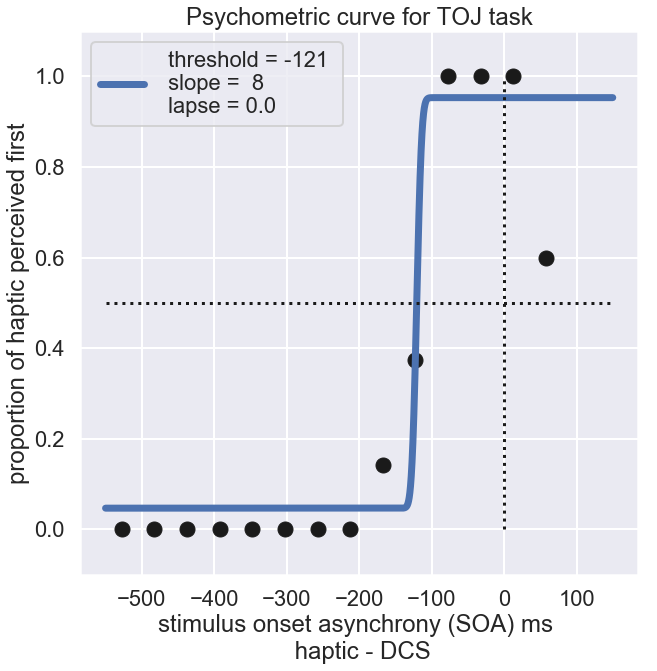

In [10]:
cc = edgeMid # contrasts
nn = histTact+histDCS # number of trials at each contrast
#ntrials = 40
#nn = ntrials*np.ones((np.shape(ratio)))
pp = ratio # proportion "rightward"
pars, L = psychofit.mle_fit_psycho(np.vstack((cc,nn,pp)),'erf_psycho',
                                   np.array([-100, 10., 0.5]), np.array([-200., 0.1, 0.]), np.array([20., 500., 1]), 50)

plt.figure(figsize=(10,10)) 
plt.plot(cc, pp, 'ko', mfc='k',markersize=15)
plt.plot(np.arange(-550,150,0.1), psychofit.erf_psycho(pars,np.arange(-550,150,0.1)), '-b',linewidth=7,label=' threshold = {:2.0f} \n slope = {:2.0f} \n lapse = {:.01f}'.format(*pars))
plt.legend()
#plt.xlim([-100,100])
plt.ylim([-0.1,1.1])
plt.plot((0,0),(0,1),'k:')
plt.plot((-550, 150),(.5, .5),'k:')

plt.xlabel('stimulus onset asynchrony (SOA) ms \n haptic - DCS')
plt.ylabel('proportion of haptic perceived first')
plt.title('Psychometric curve for TOJ task')
sns.set_context("poster")
saveFig = 1
if saveFig:
    plt.savefig('TOJ_822e26_fit.png',dpi=600)
    plt.savefig('TOJ_822e26_fit.svg')
    plt.savefig('TOJ_822e26_fit.eps')



In [11]:
pars

array([-1.20640581e+02,  7.45072862e+00,  4.68749996e-02])

[-100, 5, 0.08]
[-100, 10, 0.06]
[-100, 50, 0.01]
[-100, 100, 0.001]
[-100, 150, 0.001]


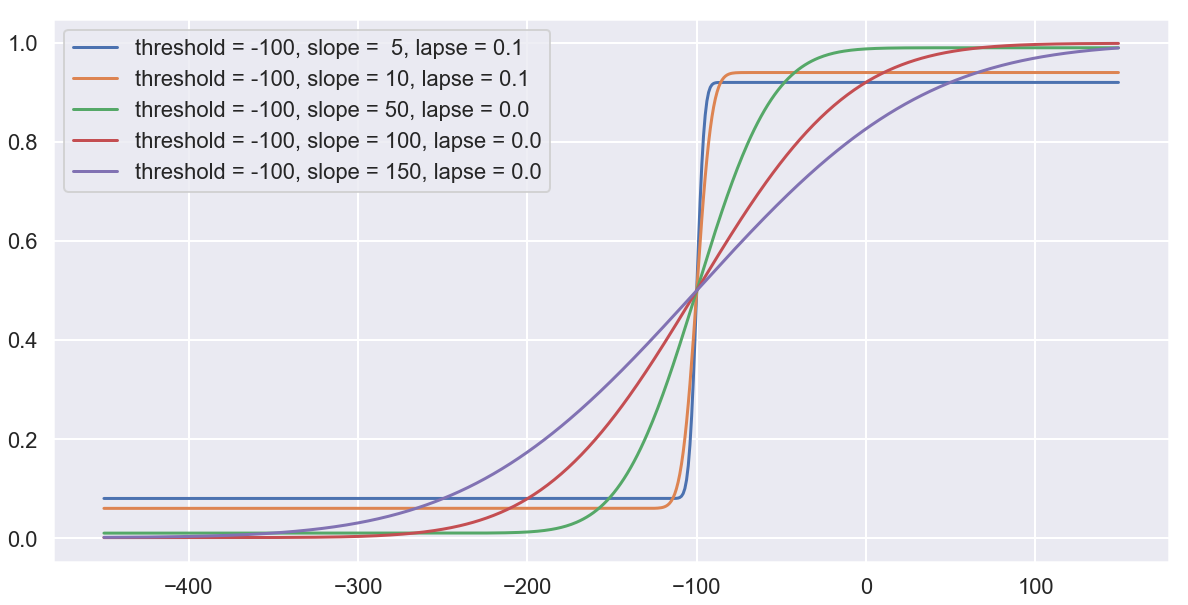

In [12]:
pars = [[-100,5,0.08],
       [-100,10,0.06],
       [-100,50,0.01],
       [-100,100,0.001],
       [-100,150,0.001]]
plt.figure(figsize=(20,10)) 
count = 0
for par in pars:
    
    print(par)
    plt.plot(np.arange(-450,150), psychofit.erf_psycho( par, np.arange(-450,150) ),
             label='threshold = {:2.0f}, slope = {:2.0f}, lapse = {:.01f}'.format(*par))
    count += 1

plt.legend()
plt.show()